<a href="https://colab.research.google.com/github/Somali19/18CSE119/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSIGNMENT - 5**

**NAME : SOMALI PATTJOSHI**

**ROLLNO : 18CSE119**

**SUBJECT : DMDW LAB ***

QUESTIONS :
1. Write a python code to find the dissimilarities matrix of nominal attributes.
2. Write a python code to find the dissimilarities matrix of numerical attributes.
3. Write a python code to find the dissimilarities matrix of binary attributes.

Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Anasuya-Sahoo/DMDW-Lab/main/student-mat.csv")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [3]:
data.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0       GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1       GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2       GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3       GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4       GP   F   16       U     GT3       T  ...     2       5        4   6  10  10
..     ...  ..  ...     ...     ...     ...  ...   ...     ...      ...  ..  ..  ..
390     MS   M   20       U     LE3       A  ...     5       4       11   9   9   9
391     MS   M   17       U     LE3       T  ...     4       2        3  14  16  16
392     MS   M   21       R     GT3       T  ...     3       3        3  10   8   7
393     MS   M   18       R     LE3       T  ...     4       5        0  11  12  10
394     MS   M   19       U     LE3       T  .

In [4]:
data.tail

<bound method NDFrame.tail of     school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0       GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1       GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2       GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3       GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4       GP   F   16       U     GT3       T  ...     2       5        4   6  10  10
..     ...  ..  ...     ...     ...     ...  ...   ...     ...      ...  ..  ..  ..
390     MS   M   20       U     LE3       A  ...     5       4       11   9   9   9
391     MS   M   17       U     LE3       T  ...     4       2        3  14  16  16
392     MS   M   21       R     GT3       T  ...     3       3        3  10   8   7
393     MS   M   18       R     LE3       T  ...     4       5        0  11  12  10
394     MS   M   19       U     LE3       T  .

In [5]:
data.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0       GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1       GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2       GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3       GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4       GP   F   16       U     GT3       T  ...     2       5        4   6  10  10
..     ...  ..  ...     ...     ...     ...  ...   ...     ...      ...  ..  ..  ..
390     MS   M   20       U     LE3       A  ...     5       4       11   9   9   9
391     MS   M   17       U     LE3       T  ...     4       2        3  14  16  16
392     MS   M   21       R     GT3       T  ...     3       3        3  10   8   7
393     MS   M   18       R     LE3       T  ...     4       5        0  11  12  10
394     MS   M   19       U     LE3       T 

1. Dissimilarities matrix of nominal attributes

In [6]:
nominal = data[['Mjob','Fjob','reason','guardian']]
nominal.head()

,Mjob,Fjob,reason,guardian
0,at_home,teacher,course,mother
1,at_home,other,course,father
2,at_home,other,other,mother
3,health,services,home,mother
4,other,other,home,father


In [7]:
nominal = nominal.replace('at_home','home')
nominal.head()


,Mjob,Fjob,reason,guardian
0,home,teacher,course,mother
1,home,other,course,father
2,home,other,other,mother
3,health,services,home,mother
4,other,other,home,father


In [8]:
nominal = nominal.astype('category')
type(nominal)

pandas.core.frame.DataFrame

In [9]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [10]:
nominal['guardian'] = lb.fit_transform(nominal['guardian'])
nominal['Mjob'] = lb.fit_transform(nominal['Mjob'])
nominal['Fjob'] = lb.fit_transform(nominal['Fjob'])
nominal['reason'] = lb.fit_transform(nominal['reason'])


In [11]:
nominal.head()

,Mjob,Fjob,reason,guardian
0,1,4,0,1
1,1,2,0,0
2,1,2,2,1
3,0,3,1,1
4,2,2,1,0


In [12]:
nom1 = np.array(nominal)
nom1.reshape(-1,2)
nom1.shape

(395, 4)

In [13]:
nom2 = np.array(nominal)
nom2.reshape(-1,2)
nom2.shape


(395, 4)

In [14]:
dist_matrix = distance.cdist(nom1,nom2)
dist_matrix

array([[0.        , 2.23606798, 2.82842712, ..., 2.44948974, 2.82842712,
        3.31662479],
       [2.23606798, 0.        , 2.23606798, ..., 2.23606798, 2.23606798,
        1.41421356],
       [2.82842712, 2.23606798, 0.        , ..., 2.44948974, 2.82842712,
        2.64575131],
       ...,
       [2.44948974, 2.23606798, 2.44948974, ..., 0.        , 1.41421356,
        2.23606798],
       [2.82842712, 2.23606798, 2.82842712, ..., 1.41421356, 0.        ,
        1.73205081],
       [3.31662479, 1.41421356, 2.64575131, ..., 2.23606798, 1.73205081,
        0.        ]])

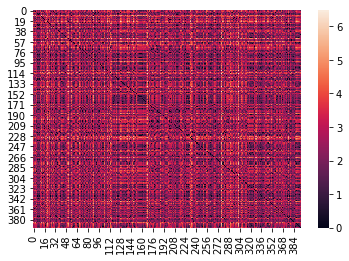

In [15]:
sns.heatmap(dist_matrix)
plt.show()

2. Dissimilarities matrix of numerical attributes

In [17]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [18]:
numerical = data[['age','Medu','Fedu','traveltime','studytime','failures']]
numerical.head()

,age,Medu,Fedu,traveltime,studytime,failures
0,18,4,4,2,2,0
1,17,1,1,1,2,0
2,15,1,1,1,2,3
3,15,4,2,1,3,0
4,16,3,3,1,2,0


In [19]:
num1 = np.array(numerical[['age','failures']])
num1.reshape(-1,2)
num1.shape

(395, 2)

In [20]:
num2 = np.array(numerical[['Fedu','Medu']])
num2.reshape(-1,2)
num2.shape

(395, 2)

In [21]:
dist_matrix1 = distance.cdist(num1,num2)
dist_matrix1

array([[14.56021978, 17.02938637, 17.02938637, ..., 17.02938637,
        16.2788206 , 17.02938637],
       [13.60147051, 16.03121954, 16.03121954, ..., 16.03121954,
        15.29705854, 16.03121954],
       [11.04536102, 14.14213562, 14.14213562, ..., 14.14213562,
        13.        , 14.14213562],
       ...,
       [17.02938637, 20.09975124, 20.09975124, ..., 20.09975124,
        19.        , 20.09975124],
       [14.56021978, 17.02938637, 17.02938637, ..., 17.02938637,
        16.2788206 , 17.02938637],
       [15.5241747 , 18.02775638, 18.02775638, ..., 18.02775638,
        17.2626765 , 18.02775638]])

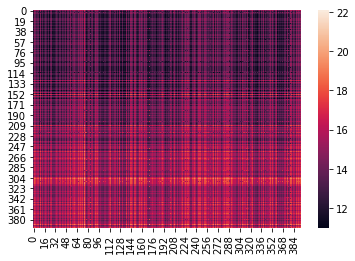

In [22]:
sns.heatmap(dist_matrix1)
plt.show()

3. Dissimilarities matrix of binary attributes

In [23]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [24]:
binary = data[['schoolsup','famsup','paid','activities','nursery','internet','higher','romantic']]
binary.head()

,schoolsup,famsup,paid,activities,nursery,internet,higher,romantic
0,yes,no,no,no,yes,no,yes,no
1,no,yes,no,no,no,yes,yes,no
2,yes,no,yes,no,yes,yes,yes,no
3,no,yes,yes,yes,yes,yes,yes,yes
4,no,yes,yes,no,yes,no,yes,no


In [25]:
binary = binary.replace('no',0)
binary = binary.replace('yes',1)
binary.head()

,schoolsup,famsup,paid,activities,nursery,internet,higher,romantic
0,1,0,0,0,1,0,1,0
1,0,1,0,0,0,1,1,0
2,1,0,1,0,1,1,1,0
3,0,1,1,1,1,1,1,1
4,0,1,1,0,1,0,1,0


In [26]:
num1 = np.array(binary[['schoolsup','famsup']])
num1 = num1.reshape(-1,2)
num1.shape

(395, 2)

In [27]:
num2 = np.array(binary[['schoolsup','famsup']])
num2 = num2.reshape(-1,2)
num2.shape

(395, 2)

In [28]:

dist_matrix2 = distance.cdist(num1,num2)
dist_matrix2.shape

(395, 395)

In [29]:
dist_matrix2

array([[0.        , 1.41421356, 0.        , ..., 1.        , 1.        ,
        1.        ],
       [1.41421356, 0.        , 1.41421356, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 1.41421356, 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

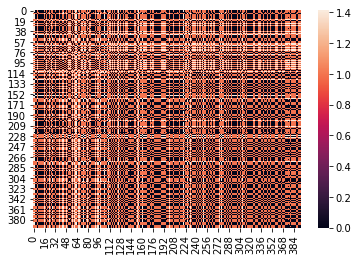

In [30]:
sns.heatmap(dist_matrix2)
plt.show()